In [42]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt



In [43]:
data = pd.read_csv("D:/nikitha studies/DELL/time series analysis.csv",index_col = 0)

In [44]:
data.head()

,TotalPrice
InvoiceDate,
12/1/2010,15.30
12/1/2010,20.34
12/1/2010,22.00
12/1/2010,20.34
12/1/2010,20.34


In [45]:
data.groupby('InvoiceDate')['TotalPrice'].sum()

InvoiceDate
1/10/2011      11628.990
1/11/2011      53585.080
1/12/2011      14289.000
1/13/2011      12809.200
1/14/2011       9866.790
1/16/2011       7242.060
1/17/2011      13503.790
1/18/2011      84038.340
1/19/2011       9152.940
1/20/2011      10352.580
1/21/2011      15216.880
1/23/2011       9885.750
1/24/2011      11976.260
1/25/2011      19062.510
1/26/2011      13900.330
1/27/2011      16739.680
1/28/2011      12243.630
1/30/2011       6615.750
1/31/2011      12759.420
1/4/2011       11577.900
1/5/2011       27412.450
1/6/2011       26406.790
1/7/2011       17617.900
1/9/2011       14306.040
10/10/2011     37257.690
10/11/2011     36664.390
10/12/2011     20410.800
10/13/2011     22930.030
10/14/2011     22164.670
10/16/2011     22010.960
                 ...    
8/5/2011       15396.070
8/7/2011        7469.560
8/8/2011       17281.530
8/9/2011       13355.430
9/1/2011       29063.320
9/11/2011      33745.400
9/12/2011      27989.400
9/13/2011      35153.330
9/14/2011    

In [46]:
data1 = data.groupby('InvoiceDate')['TotalPrice'].sum()

In [47]:
df1 = pd.DataFrame(data=data1.index, columns=['InvoiceDate'])
df2 = pd.DataFrame(data=data1.values, columns=['Total Income'])
dataset = pd.merge(df1, df2, left_index=True, right_index=True)

In [48]:
dataset.head()

,InvoiceDate,Total Income
0,1/10/2011,11628.99
1,1/11/2011,53585.08
2,1/12/2011,14289.00
3,1/13/2011,12809.20
4,1/14/2011,9866.79


In [49]:
data1.head()

InvoiceDate
1/10/2011    11628.99
1/11/2011    53585.08
1/12/2011    14289.00
1/13/2011    12809.20
1/14/2011     9866.79
Name: TotalPrice, dtype: float64

In [50]:
dataset = dataset.set_index(['InvoiceDate']) 

In [51]:
dataset.head()

,Total Income
InvoiceDate,
1/10/2011,11628.99
1/11/2011,53585.08
1/12/2011,14289.00
1/13/2011,12809.20
1/14/2011,9866.79


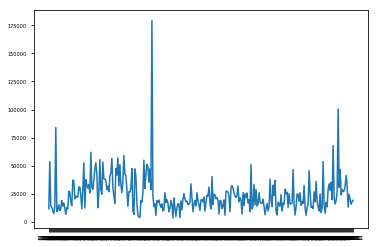

In [52]:
fig, ax = plt.subplots()
ax.plot(dataset)

In [53]:
rolmean = dataset.rolling(window = 12).mean()
rolstd = dataset.rolling(window = 12).std()
print(rolmean, rolstd)

             Total Income
InvoiceDate              
1/10/2011             NaN
1/11/2011             NaN
1/12/2011             NaN
1/13/2011             NaN
1/14/2011             NaN
1/16/2011             NaN
1/17/2011             NaN
1/18/2011             NaN
1/19/2011             NaN
1/20/2011             NaN
1/21/2011             NaN
1/23/2011    20964.283333
1/24/2011    20993.222500
1/25/2011    18116.341667
1/26/2011    18083.952500
1/27/2011    18411.492500
1/28/2011    18609.562500
1/30/2011    18557.370000
1/31/2011    18495.339167
1/4/2011     12456.969167
1/5/2011     13978.595000
1/6/2011     15316.445833
1/7/2011     15516.530833
1/9/2011     15884.888333
10/10/2011   17991.674167
10/11/2011   19458.497500
10/12/2011   20001.036667
10/13/2011   20516.899167
10/14/2011   21343.652500
10/16/2011   22626.586667
...                   ...
8/5/2011     20672.991667
8/7/2011     20311.364167
8/8/2011     19534.051667
8/9/2011     19164.957500
9/1/2011     18589.456667
9/11/2011   

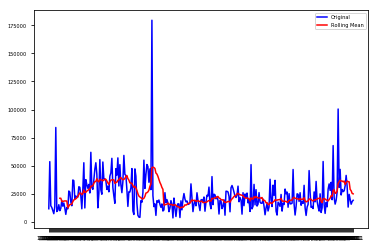

In [54]:
orig = plt.plot(dataset, color = 'blue', label = 'Original')
mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
# std = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.show(block = False)

In [55]:
#Perform Dickey - Fuller test
from statsmodels.tsa.stattools import adfuller

print("results of Dickey Fuller Test :")
dftest = adfuller(dataset['Total Income'], autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#lags Used', 'No of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

results of Dickey Fuller Test :
Test Statistic              -4.848552
p-value                      0.000044
#lags Used                   4.000000
No of Observations Used    300.000000
Critical Value (1%)         -3.452337
Critical Value (5%)         -2.871223
Critical Value (10%)        -2.571929
dtype: float64


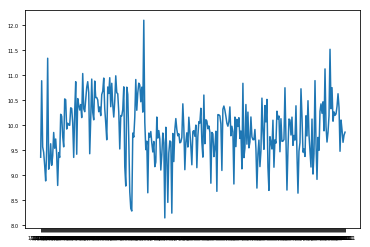

In [56]:
#this is not required as our data is already good.
dataset_logscale = np.log(dataset)
plt.plot(dataset_logscale)

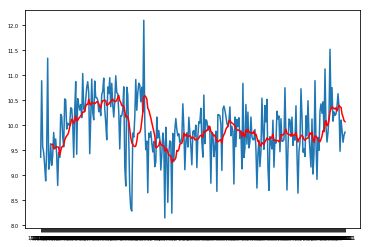

In [57]:
movingAverage = dataset_logscale.rolling(window = 12).mean()
movingstd = dataset_logscale.rolling(window = 12).std()
plt.plot(dataset_logscale)
plt.plot(movingAverage, color = 'red')

In [58]:
#Perform Dickey - Fuller test

print("results of Dickey Fuller Test :")
dftest = adfuller(dataset_logscale['Total Income'], autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#lags Used', 'No of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

results of Dickey Fuller Test :
Test Statistic              -4.001640
p-value                      0.001402
#lags Used                   5.000000
No of Observations Used    299.000000
Critical Value (1%)         -3.452411
Critical Value (5%)         -2.871255
Critical Value (10%)        -2.571947
dtype: float64


In [60]:
dataset_logscale.index = pd.to_datetime(dataset_logscale.index)

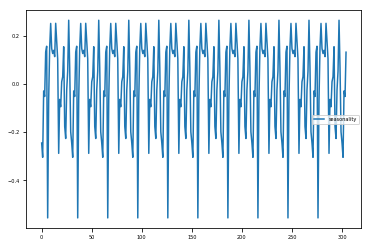

In [61]:
#now visually you can see no trend. Let's do some analysis on this.
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(dataset_logscale.values, freq = 30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.rcParams["font.size"] = 5
#plt.subplot(11)
#plt.plot(dataset, label = 'original')
#plt.legend(loc = 'best')
#plt.legend(loc = 'best')
plt.subplot(111)
plt.plot(seasonal, label = 'seasonality')
plt.legend(loc = 'best')


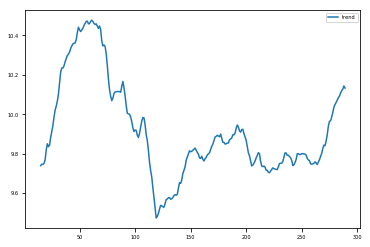

In [62]:
plt.subplot(111)
plt.plot(trend, label = 'trend')
plt.legend(loc = 'best')

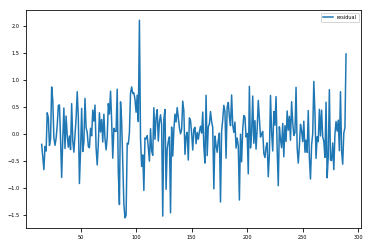

In [63]:
#to check if the noise is constant
plt.subplot(111)
plt.plot(residual, label = 'residual')
plt.legend(loc = 'best')


Text(0.5,1,'Autocorrelation Function')

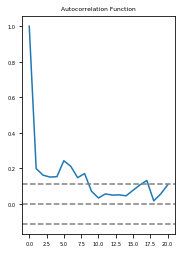

In [64]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(dataset, nlags = 20)
lag_pacf = pacf(dataset, nlags = 20, method = 'ols')

#plot acf
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y = 0 ,linestyle = '--',color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(dataset)),linestyle = '--',color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(dataset)),linestyle = '--',color = 'gray')
plt.title('Autocorrelation Function')

Text(0.5,1,'Partial Autocorrelation Function')

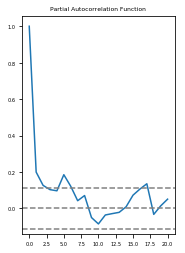

In [65]:
#plot pacf
plt.subplot(121)
plt.plot(lag_pacf)
plt.axhline(y = 0 ,linestyle = '--',color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(dataset)),linestyle = '--',color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(dataset)),linestyle = '--',color = 'gray')
plt.title('Partial Autocorrelation Function')

C:\Users\D C NIKITHA\AppData\Local\Programs\Python\Python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\D C NIKITHA\AppData\Local\Programs\Python\Python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\D C NIKITHA\AppData\Local\Programs\Python\Python36\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\D C NIKITHA\AppData\Local\Programs\Python\Python36\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimiz

AttributeError: 'ARIMAResults' object has no attribute 'fittedValues'

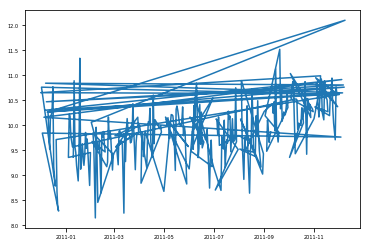

In [67]:
from statsmodels.tsa.arima_model import ARIMA
#ar model
model = ARIMA(dataset_logscale,order=(8,1,8))
results_AR = model.fit(disp = -1)
plt.plot(dataset_logscale)
plt.plot(results_AR.fittedValues, color = 'red')